### <center>Empirical Methods in Finance</center>
### <center>Homework 5</center>
#### <center>Authors - Ashutosh Ekade</center>

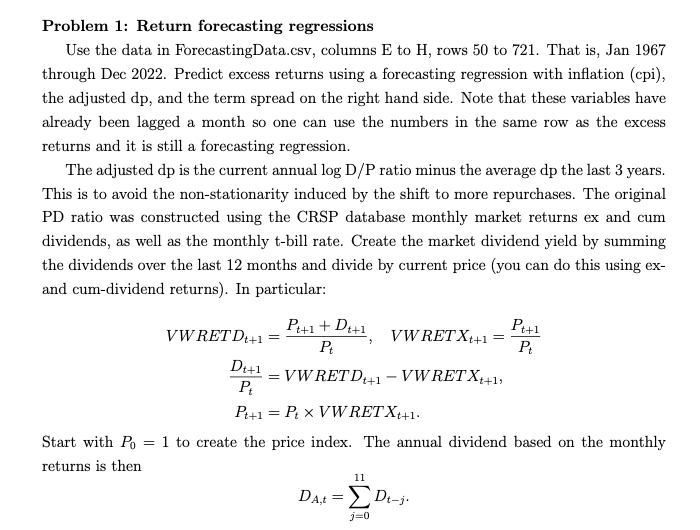

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

In [3]:
df = pd.read_csv('./ForecastingData.csv')
df = df.iloc[49:, 0:15]
df['caldt'] = pd.to_datetime(df['caldt'], format='%Y%m%d')
df.set_index('caldt', inplace=True)
print(df.shape)
print(df.head())

(671, 14)
              vwretd    vwretx  l.t30_yield     l.cpi  l.y10minFF  l.dp_adj  \
caldt                                                                         
1967-02-28  0.010945  0.006257     0.003743  0.000000      0.0052  0.152243   
1967-03-31  0.043384  0.041582     0.003693  0.000000     -0.0003  0.060992   
1967-04-28  0.041609  0.040696     0.003344  0.003040      0.0000  0.048677   
1967-05-31 -0.039293 -0.044217     0.003126  0.003030      0.0078  0.003264   
1967-06-30  0.026902  0.025341     0.002674  0.003021      0.0068 -0.032832   

            ExcessRet  Unnamed: 8  PriceIndex        Dt       DtA     Pt/DtA  \
caldt                                                                          
1967-02-28   0.007150         NaN    1.404308  0.006073  0.044805  31.342393   
1967-03-31   0.038783         NaN    1.413095  0.002531  0.044631  31.662038   
1967-04-28   0.037428         NaN    1.471854  0.001290  0.044480  33.090068   
1967-05-31  -0.043207         NaN   

In [4]:
df['gross_dividends'] = 1 + df['Dt']
df['log_excess'] =  df['gross_dividends'] - np.log(1 + df['l.t30_yield'])
# df["cumret"]= df['log_excess'].rolling(window=12).sum()
df.drop(columns=["vwretd", "vwretx", "Unnamed: 8", "PriceIndex", "DtA", "Pt/DtA", "pd", "Adjusted pd"], inplace=True)

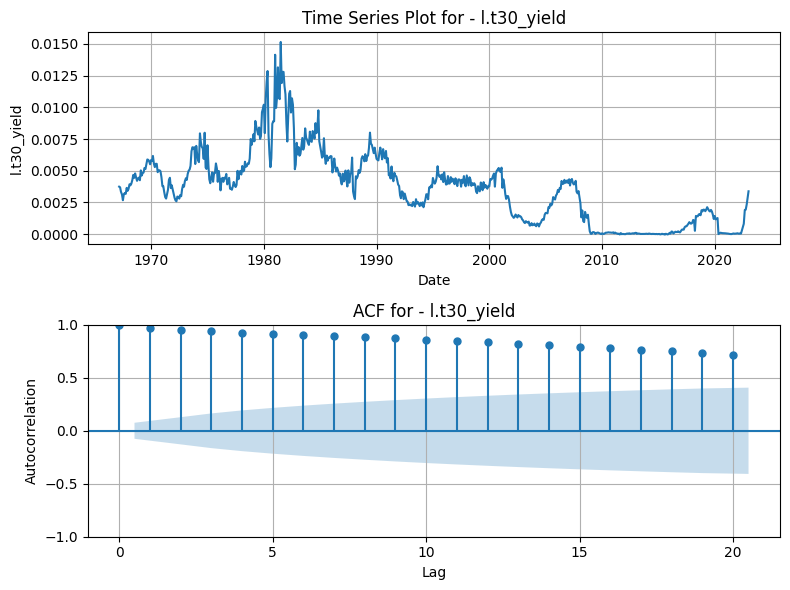

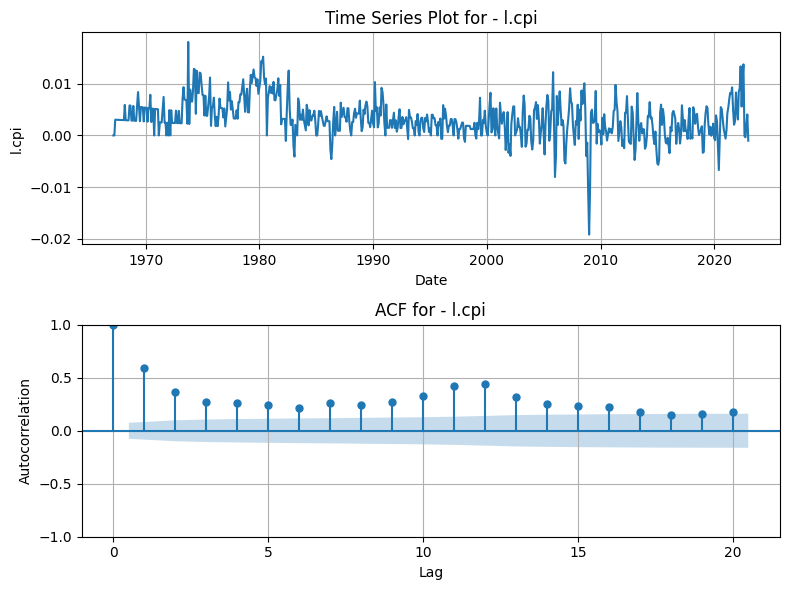

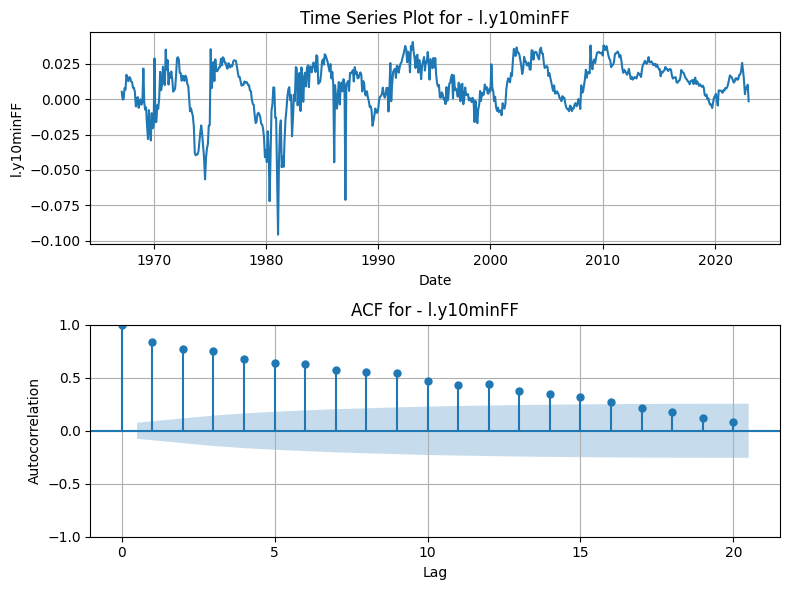

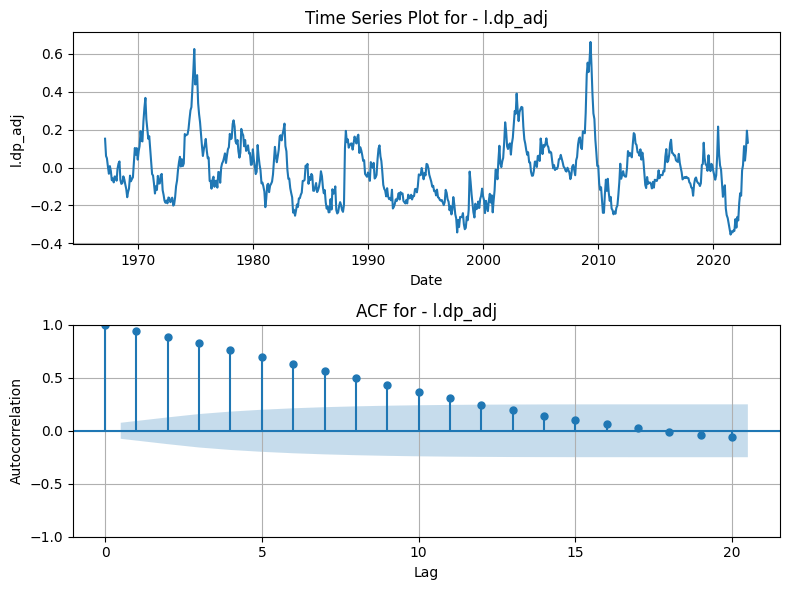

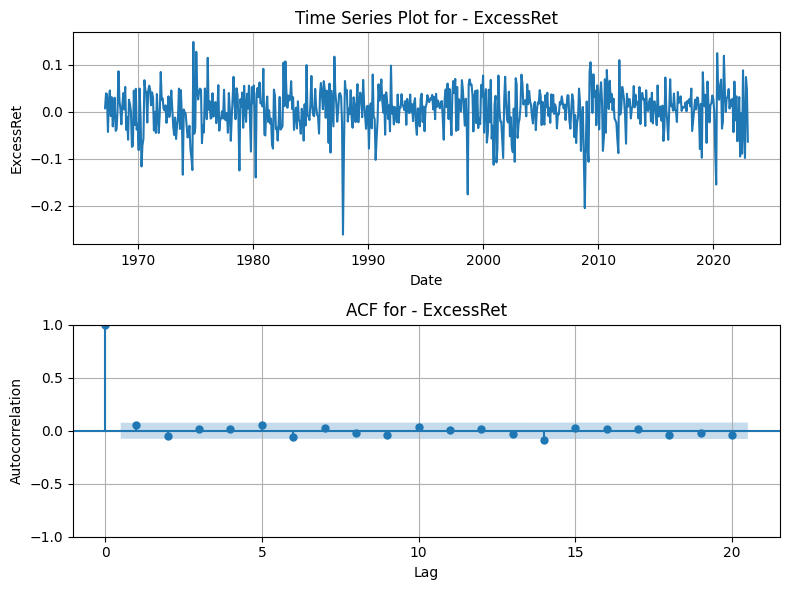

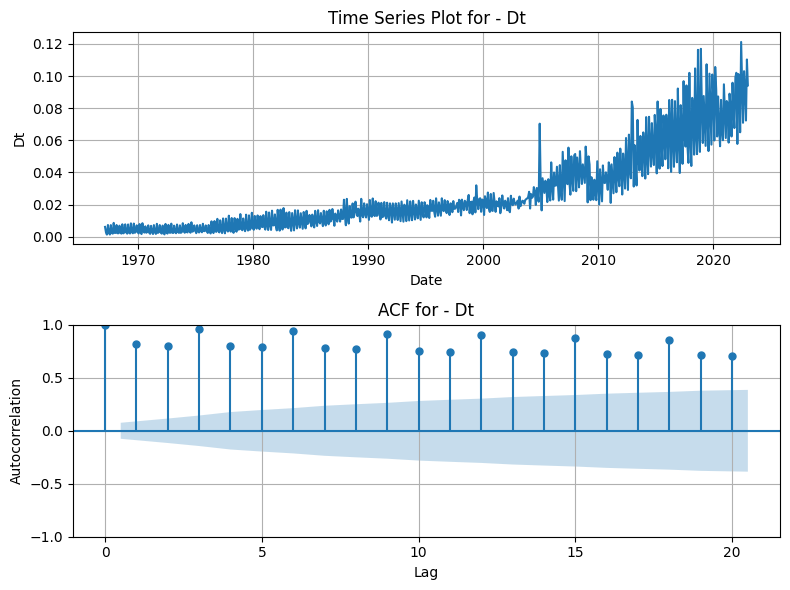

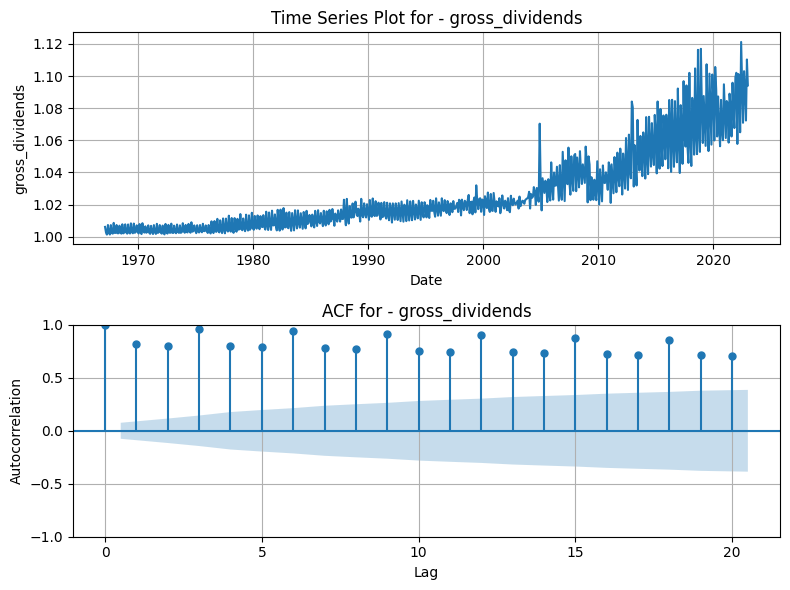

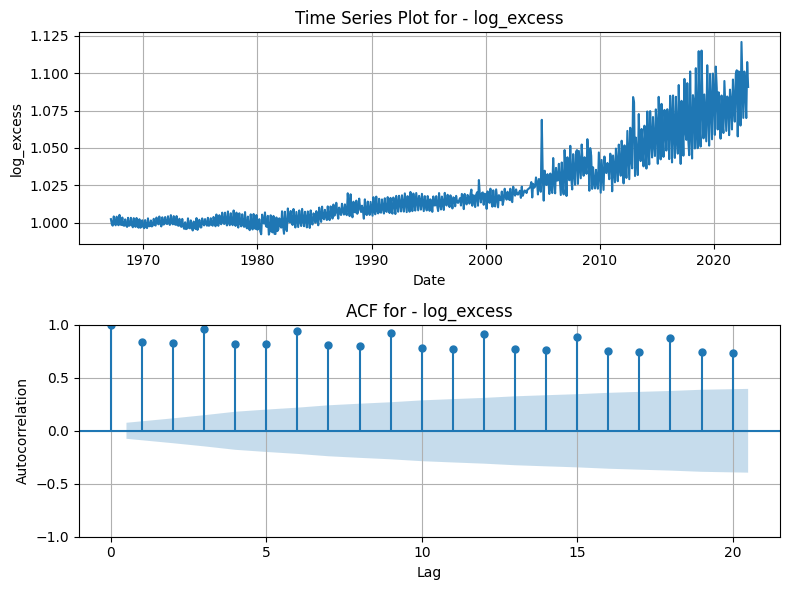

In [5]:
for column in df.columns:
    fig, axs = plt.subplots(2, 1, figsize=(8, 6))
    # Plot time series data
    axs[0].plot(df.index, df[column])
    axs[0].set_title(f'Time Series Plot for - {column}')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('{}'.format(column))
    axs[0].grid(True)
    # Plot ACF
    plot_acf(df[column], ax=axs[1], lags=20)
    axs[1].set_title(f'ACF for - {column}')
    axs[1].set_xlabel('Lag')
    axs[1].set_ylabel('Autocorrelation')
    axs[1].grid(True)
    plt.tight_layout()
    plt.show()

In [6]:
print(df.head(-5))

            l.t30_yield     l.cpi  l.y10minFF  l.dp_adj  ExcessRet        Dt  \
caldt                                                                          
1967-02-28     0.003743  0.000000      0.0052  0.152243   0.007150  0.006073   
1967-03-31     0.003693  0.000000     -0.0003  0.060992   0.038783  0.002531   
1967-04-28     0.003344  0.003040      0.0000  0.048677   0.037428  0.001290   
1967-05-31     0.003126  0.003030      0.0078  0.003264  -0.043207  0.007247   
1967-06-30     0.002674  0.003021      0.0068 -0.032832   0.023876  0.002391   
...                 ...       ...         ...       ...        ...       ...   
2022-03-31     0.000060  0.009134      0.0175 -0.186578   0.030940  0.100489   
2022-04-29     0.000037  0.013351      0.0199 -0.135701  -0.095417  0.064981   
2022-05-31     0.000307  0.005583      0.0256 -0.148977  -0.003100  0.121198   
2022-06-30     0.000567  0.011024      0.0202 -0.015454  -0.089322  0.096730   
2022-07-29     0.000812  0.013736      0

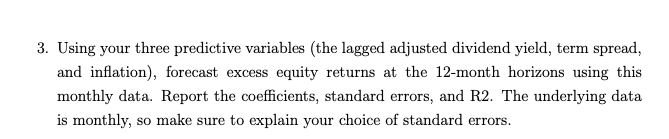

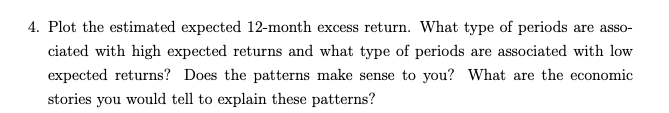

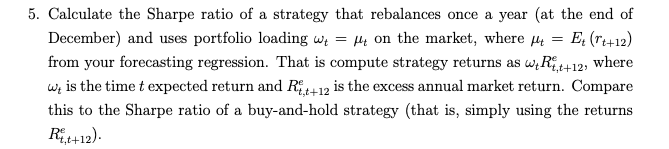

                            OLS Regression Results                            
Dep. Variable:              ExcessRet   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.884
Date:                Sun, 11 Feb 2024   Prob (F-statistic):              0.131
Time:                        22:55:27   Log-Likelihood:                 883.60
No. Observations:                 536   AIC:                            -1759.
Df Residuals:                     532   BIC:                            -1742.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0095      0.004      2.321      

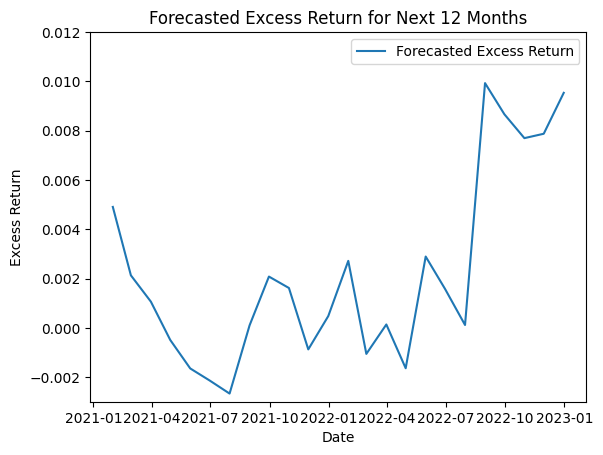

In [7]:
X = df[['l.t30_yield', 'l.cpi', 'l.dp_adj']]
y = df['ExcessRet']

X = sm.add_constant(X)

# Splitting into training and testing sets
train_size = int(0.8 * len(df))  # 80% for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Fiting the regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Get the forecast for the next 12 months
forecast_results = results.get_prediction(exog=X_test)
forecast_mean = forecast_results.predicted_mean
# Summary
print(results.summary())

# Plots
forecast_dates = pd.date_range(start=X_test.index[0], periods=len(forecast_mean), freq='M')
plt.plot(forecast_dates[-24:], forecast_mean[-24:], label='Forecasted Excess Return')
plt.ylim(-0.0030, 0.012)
plt.xlabel('Date')
plt.ylabel('Excess Return')
plt.title('Forecasted Excess Return for Next 12 Months')
plt.legend()
plt.show()

R-squared of 0.011, means that only 1.1% of the variance of Excess Returns is being explained by our variables, which is not a good sign.

Coeffients:

1. Adjusted Dividend yield: Negative which means that higher dividend yield is associated with a lower expected return. This is consistent with the theory that higher dividend yields indicate that stocks are less risky, and therefore investors demand lower returns for them.
2. Term Spread: Positive but statistically significant. A positive term spread is generally seen as an indicator of economic optimism, as it suggests that investors expect interest rates to rise in the future.
3. Inflation: negative but statistically insignificant.

In [8]:
# Returns for the Rebalancing strategy
rebalanced_strategy_returns = forecast_mean * y_test

# Returns for the buy-and-hold strategy
buy_and_hold_returns = y_test

# Annualized returns
rebalanced_annual_return = rebalanced_strategy_returns.mean() * 12
buy_and_hold_annual_return = buy_and_hold_returns.mean() * 12

# Annualized standard deviation
rebalanced_annual_std = rebalanced_strategy_returns.std() * np.sqrt(12)
buy_and_hold_annual_std = buy_and_hold_returns.std() * np.sqrt(12)

# We will assume risk-free interest rate to be 0
risk_free_rate = 0

# Sharpe for the Rebalancing strategy
rebalanced_sharpe_ratio = (rebalanced_annual_return - risk_free_rate) / rebalanced_annual_std

# Sharpe for the buy-and-hold strategy
buy_and_hold_sharpe_ratio = (buy_and_hold_annual_return - risk_free_rate) / buy_and_hold_annual_std

print("Sharpe ratio for rebalanced strategy: {:.2f}".format(rebalanced_sharpe_ratio))
print("Sharpe ratio for buy-and-hold strategy: {:.2f}".format(buy_and_hold_sharpe_ratio))

Sharpe ratio for rebalanced strategy: 0.86
Sharpe ratio for buy-and-hold strategy: 0.73


Q2: M/B ratios and the present value formula

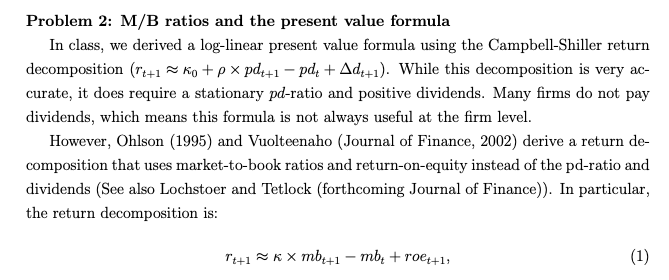

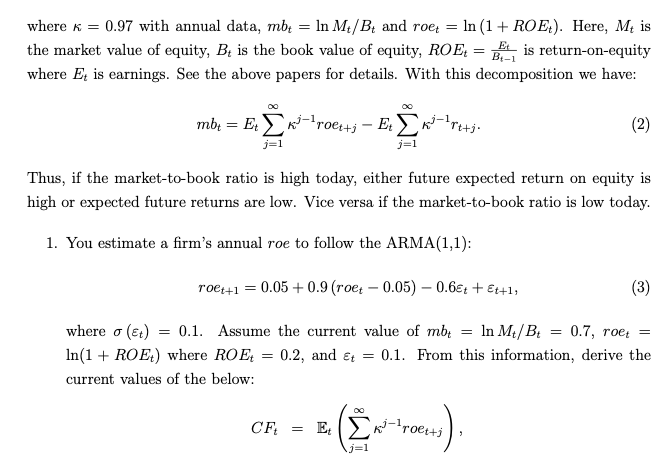

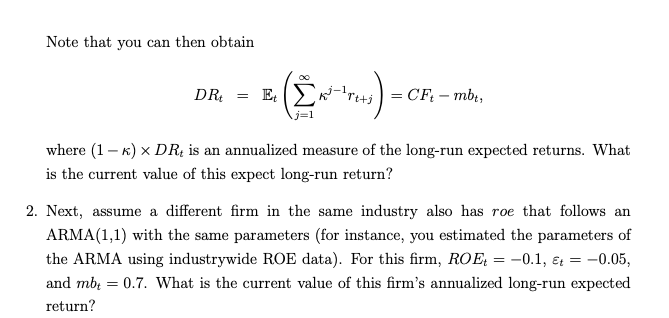

As $roe_{t+1}$ is stationary, $\mathbb{E}[roe_{t+j}] = roe_{t+1} $. Thus, we can use the relationship $\sum_0^\infty(ar^k) = \frac{a}{1-r}$

In [9]:
roe_t = np.log(1.2)
k = 0.97
epsilon = 0.1
mbt = 0.7
roe_t1 = 0.05 + 0.9*(roe_t - 0.05) - epsilon * 0.6
CF = roe_t1 / (1-k)
DRt = CF - mbt
lrer = (1-k) * DRt
print("CFt is equal to: {:.4f}".format(CF))
print("Expected long-run return is: {:.4f}".format(lrer))

CFt is equal to: 3.6363
Expected long-run return is: 0.0881


Similarly, for the new company:

In [10]:
roe_tn = np.log(1-0.1)
epsilon = -0.05
mbtn = 0.7
roe_t1n = 0.05 + 0.9*(roe_tn - 0.05) - epsilon * 0.6
CFn = roe_t1n / (1-k)
DRtn = CFn - mbtn
lrern = (1-k) * DRtn
print("CFt is equal to: {:.4f}".format(CFn))
print("Expected long-run return is: {:.4f}".format(lrern))

CFt is equal to: -1.9941
Expected long-run return is: -0.0808


I will pick up the first firm as for the second firm, the long-run returns are negative.